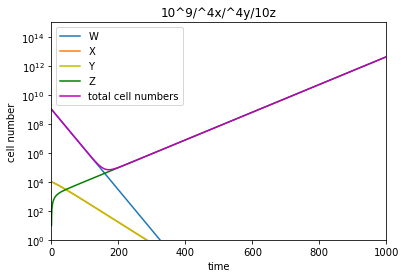

In [2]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 

initial_N = 10**9
t_end = 1000
list_t = np.arange(0, t_end, 0.01) 

aC = -0.064
bC = -0.0335
cC = -0.0335
fC = 0.022
gC = hC = kC = pC = qC = 0.0000001
paramsC = (aC, bC, cC, fC, gC, hC, kC, pC, qC)

cell_init = (initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10)
cells = odeint(func, cell_init, list_t, args = paramsC)
celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
# lastone = celltotal[-1]
# print(lastone, 'test')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.hstack(list_t), np.hstack(cells[:, 0]), label='W')
ax.plot(np.hstack(list_t), np.hstack(cells[:, 1]), label='X')
ax.plot(np.hstack(list_t), np.hstack(cells[:, 2]), 'y', label='Y')
ax.plot(np.hstack(list_t), np.hstack(cells[:, 3]), 'g', label='Z')
ax.plot(np.hstack(list_t), np.hstack(celltotal), 'm', label='total cell numbers')

ax.legend()

ax.set_yscale('log')
ax.set_xlim(0, 1000)
ax.set_ylim(10**0, 10**15)
ax.set_title('10^9/^4x/^4y/10z')
ax.set_xlabel('time')
ax.set_ylabel('cell number')

plt.show()